In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns; sns.set()


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
oecd = pd.read_csv('../resources/econ_happy_data_allyears.csv')
oecd.head()

,Unnamed: 0,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),Healthy life expectancy at birth,Happiness Index,Log GDP per capita,Perceptions of corruption,Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Social support,"gini of household income reported in Gallup, by wp5-year"
0,0,52252,1699,0,1,0,1144260000000,72,7,10,0,2,1,0,0
1,1,50096,1557,0,1,0,391893000000,71,7,10,0,101,1,0,0
2,2,50872,1546,0,1,0,483548000000,70,6,10,0,359,1,0,0
3,3,45502,1715,0,1,0,1613460000000,72,7,10,0,3,1,0,0
4,4,24960,2070,0,0,0,218538000000,68,6,9,0,22,1,0,0


In [30]:
y = oecd["Happiness Index"]


In [31]:
X = oecd.drop(["Happiness Index"], axis=1)
feature_names = X.columns

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Jose\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.783
Accuracy score (validation): 0.685
Learning rate:  0.075
Accuracy score (training): 0.845
Accuracy score (validation): 0.741
Learning rate:  0.1
Accuracy score (training): 0.870
Accuracy score (validation): 0.759
Learning rate:  0.25
Accuracy score (training): 0.957
Accuracy score (validation): 0.870
Learning rate:  0.5
Accuracy score (training): 0.988
Accuracy score (validation): 0.907
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.870
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.833


In [35]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 1  2  0  0]
 [ 0 12  0  0]
 [ 0  2 14  0]
 [ 0  0  1 22]]
Classification Report
              precision    recall  f1-score   support

           4       1.00      0.33      0.50         3
           5       0.75      1.00      0.86        12
           6       0.93      0.88      0.90        16
           7       1.00      0.96      0.98        23

   micro avg       0.91      0.91      0.91        54
   macro avg       0.92      0.79      0.81        54
weighted avg       0.92      0.91      0.90        54



In [55]:
import pydotplus
from sklearn import tree



for i in range(gb_clf.estimators_.shape[0]):
    dot_data = tree.export_graphviz(gb_clf.estimators_[i][0], out_file=None) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    name = 'xgbtree' 
    graph.write_png(name+  '.png')

In [37]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost as xgb

In [38]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [39]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.8518518518518519


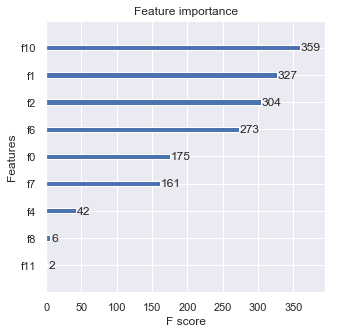

In [50]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()